### Lab 1: Filters, Convolution, Edge Detection

## 1. Filters

In [80]:
from PIL import Image
from numpy import *
import numpy as np
from PIL import Image

# import scikit-image
import skimage
from skimage import util
from scipy import signal

# import matplotlib
import matplotlib.pyplot as plt

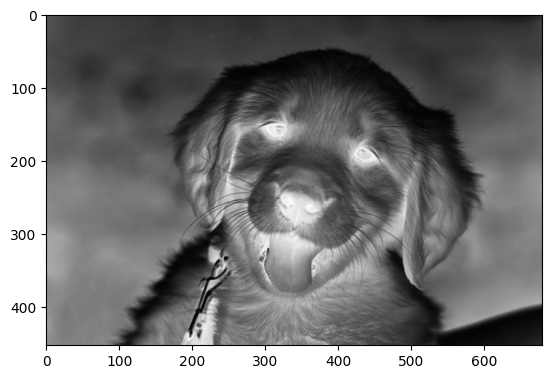

In [81]:
image = array(Image.open('res/puppy.jpg').convert(mode="L"))
# import the image for matplotlib
plt.imshow(image, cmap="gray_r")

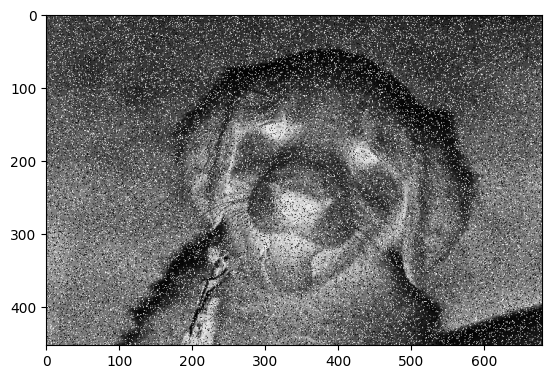

In [84]:
# Apply salt and pepper noise
img_sp_noise = util.random_noise(image, mode='s&p', clip=True, amount=0.18)

# Convert the image back to the range [0, 255]
img_sp_noise = (img_sp_noise * 255).astype(np.uint8)
# Show the image with salt and pepper noise
plt.imshow(img_sp_noise, cmap="gray_r")

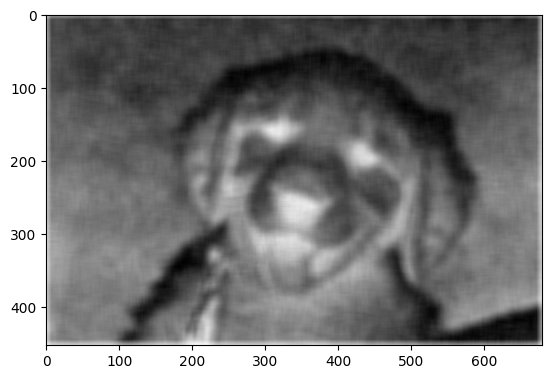

In [85]:
def box_filter(dim):
    # create a box filter of dimension 3x3 
    return np.ones((dim, dim)) * 1 / dim ** 2

img_denoised_box_conv = signal.convolve2d(img_sp_noise, box_filter(15), mode="same")
# plot the denoised image using matplotlib 
plt.imshow(img_denoised_box_conv, cmap="gray_r")

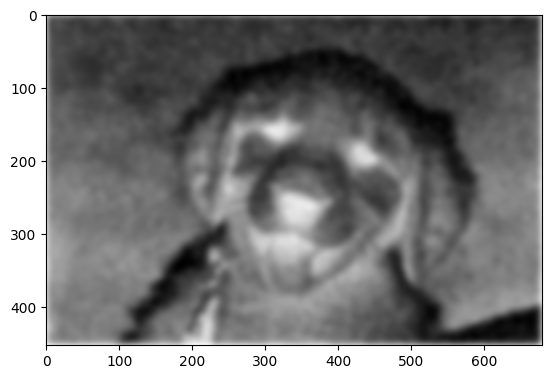

In [86]:
# Comparing Box Filter to using Gaussian Filter

# Create a Gaussian filter
def gaussian_filter(size, sigma):
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

# Apply the Gaussian filter
img_denoised_gaussian_conv = signal.convolve2d(img_sp_noise, gaussian_filter(15, 5), mode="same")
# Visualize the denoised image
plt.imshow(img_denoised_gaussian_conv, cmap="gray_r")


## 2. Edge Detection


In [55]:
# Simple Edge Filter: 

simple_edge_filter = [[-1, 0, 1]] 
img_edges = signal.convolve2d(image, simple_edge_filter, mode="same")
# Normalize the image to the range [0, 255]
img_edges = np.clip(img_edges, 0, 255).astype(np.uint8)
# Visualize the edges
Image.fromarray(img_edges).show()

In [56]:
# use correlation instead of convolution
img_edges_corr = signal.correlate2d(image, simple_edge_filter, mode="same")
# Normalize the image to the range [0, 255]
img_edges_corr = np.clip(img_edges_corr, 0, 255).astype(np.uint8)
# Visualize the edges
Image.fromarray(img_edges_corr).show()

TypeError: Cannot handle this data type: (1, 1), <i8